In [1]:
import pandas as pd

In [2]:
dataFrame = pd.read_csv('Classified_Data.csv')

In [3]:
dataFrame.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1000 non-null   int64  
 1   WTT           1000 non-null   float64
 2   PTI           1000 non-null   float64
 3   EQW           1000 non-null   float64
 4   SBI           1000 non-null   float64
 5   LQE           1000 non-null   float64
 6   QWG           1000 non-null   float64
 7   FDJ           1000 non-null   float64
 8   PJF           1000 non-null   float64
 9   HQE           1000 non-null   float64
 10  NXJ           1000 non-null   float64
 11  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 93.9 KB


In [5]:
dataFrame.shape

(1000, 12)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaling_model = StandardScaler()

In [10]:
scaling_model.fit(dataFrame.drop(columns = 'TARGET CLASS', axis = 1))

StandardScaler()

In [11]:
scaled_features = scaling_model.transform(dataFrame.drop(columns = 'TARGET CLASS', axis = 1))

In [13]:
scaled_features

array([[-1.73031962, -0.12354188,  0.18590747, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.72685552, -1.08483602, -0.43034845, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-1.72339142, -0.78870217,  0.33931821, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 1.72339142,  0.64177714, -0.51308341, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 1.72685552,  0.46707241, -0.98278576, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [ 1.73031962, -0.38765353, -0.59589427, ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [14]:
x = scaled_features
y = dataFrame['TARGET CLASS']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
import numpy as np

In [26]:
import sys

In [33]:
rating = []
min_k_value = sys.maxsize
min_error = sys.maxsize
for i in range(1, 51):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train, y_train)
    model_predictions = model.predict(x_test)
    error_value = np.mean(model_predictions != y_test)
    rating.append(error_value)
    if error_value < min_error:
        min_error = error_value
        min_k_value = i

In [23]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'rating')

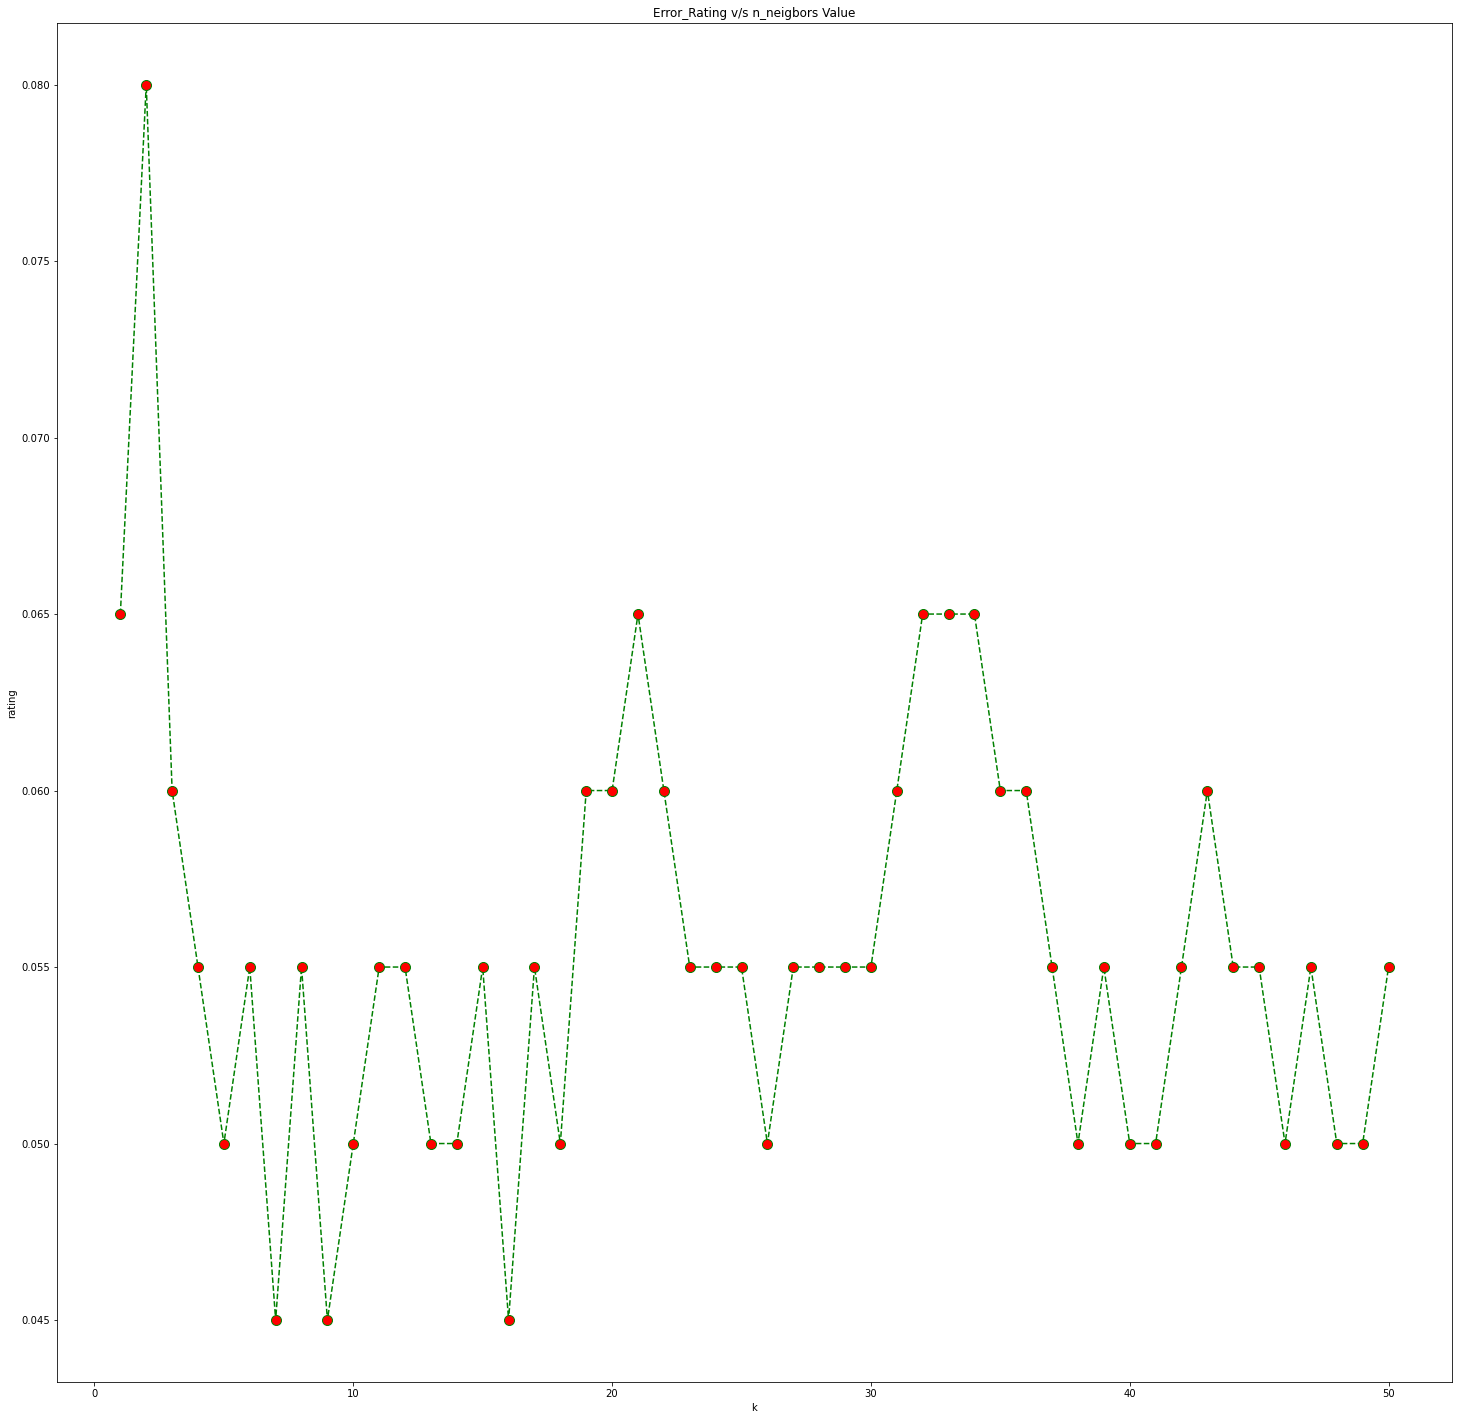

In [24]:
plt.figure(figsize = (25, 25))
plt.plot(range(1, 51), rating, color = 'green', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error_Rating v/s n_neigbors Value')
plt.xlabel('k')
plt.ylabel('rating')

In [29]:
min_error = sys.maxsize

In [30]:
min_error

9223372036854775807

In [31]:
for i in rating:
    if min_error > i:
        min_error = i

In [32]:
min_error

0.045

In [34]:
min_k_value

7

In [35]:
model = KNeighborsClassifier(n_neighbors = min_k_value)

In [36]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [37]:
model_predictions = model.predict(x_test)

In [38]:
model_predictions

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
score = accuracy_score(model_predictions, y_test)

In [41]:
score

0.955